In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("E:\Deep Learning\Projects\Working with text\wine-reviews.csv")

In [4]:
df.shape

(129971, 14)

In [10]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
df = df[['description','points','price']]

In [6]:
df.head()

,description,points,price
0,"Aromas include tropical fruit, broom, brimston...",87,NaN
1,"This is ripe and fruity, a wine that is smooth...",87,15.0
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0
4,"Much like the regular bottling from 2012, this...",87,65.0


In [3]:
df = df.dropna(subset=['description','points'])

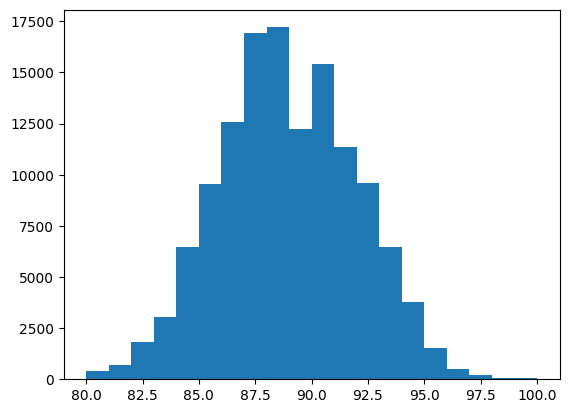

In [17]:
plt.hist(df.points, bins=20)
plt.show()

In [4]:
df['label'] = (df.points>=90).astype('int')

In [5]:
df.tail()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,label
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),1
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,1
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,1
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,1
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit,1


In [6]:
df = df.drop(['price','points'],axis=1)

In [7]:
df.head()

,Unnamed: 0,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,label
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0


In [8]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [9]:
len(train), len(val), len(test)

(103976, 12997, 12998)

In [10]:
list(train)[0]

'Unnamed: 0'

In [16]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df['description']
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [17]:
train_data = df_to_dataset(train)
val_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [33]:
list(train_data)[0]

(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b'An interesting and even somewhat eccentric wine. There are notes of green tea and herbs, but enough pure orange fruit to make it rich. Lots of zingy acidity, too.',
        b'Spanish producer Vicente Gandia continues its venture into Portugal with this ripe, spicy and toasty wine. Wood flavors mingle with the red fruits and bright acidity. It is rich, full and ready to drink.',
        b'A tremendous wine that shows how Merryvale is absolutely at the top of its game. Impeccable in structure, with refined tannins that are soft and firm at the same time, and a fine cut of acidity. Entirely dry, the Cabernet Sauvignon-based blend is awesome in blackberry, cherry, cassis and oak flavors, with complexities of anise, soy sauce, grilled meats and minerals. Beyond the particulars, it just feels dramatic and rich in the mouth. A great wine that should develop in the bottle over the next decade.',
        ...,
        b'This wine has bri

In [11]:
import tensorflow_hub as hub

In [12]:
embeddings = 'https://tfhub.dev/google/nnlm-en-dim50/2'

In [13]:
hub_layers = hub.KerasLayer(embeddings, dtype=tf.string, trainable=True)

In [41]:
hub_layers(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.24572276, -0.36091384,  0.10273153, ...,  0.14288709,
        -0.13502821, -0.13937269],
       [ 0.369122  , -0.4019471 ,  0.11323448, ..., -0.16711795,
        -0.08160934, -0.1330479 ],
       [ 0.2788424 ,  0.00949843,  0.21895003, ..., -0.01931249,
        -0.0084666 ,  0.05532731],
       ...,
       [ 0.48060924,  0.03989647,  0.09138152, ...,  0.08877911,
        -0.14054622,  0.04525078],
       [ 0.29852596, -0.17824663, -0.14174937, ...,  0.25832605,
        -0.3071658 , -0.06759486],
       [ 0.643509  , -0.3905521 ,  0.16857293, ..., -0.01933677,
        -0.17234768,  0.22234343]], dtype=float32)>

In [14]:
model = models.Sequential([
    hub_layers,
    layers.Dense(16,activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(16,activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1,activation='sigmoid')
])

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [16]:
model.evaluate(train)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [53]:
history = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
102/102 [==============================] - 45s 433ms/step - loss: 0.6248 - accuracy: 0.6426 - val_loss: 0.4790 - val_accuracy: 0.7862
Epoch 2/10
102/102 [==============================] - 47s 459ms/step - loss: 0.4550 - accuracy: 0.7958 - val_loss: 0.3975 - val_accuracy: 0.8134
Epoch 3/10
102/102 [==============================] - 43s 424ms/step - loss: 0.3915 - accuracy: 0.8318 - val_loss: 0.3797 - val_accuracy: 0.8223
Epoch 4/10
102/102 [==============================] - 43s 424ms/step - loss: 0.3570 - accuracy: 0.8510 - val_loss: 0.3763 - val_accuracy: 0.8247
Epoch 5/10
102/102 [==============================] - 44s 429ms/step - loss: 0.3322 - accuracy: 0.8623 - val_loss: 0.3796 - val_accuracy: 0.8273
Epoch 6/10
102/102 [==============================] - 45s 438ms/step - loss: 0.3134 - accuracy: 0.8714 - val_loss: 0.3820 - val_accuracy: 0.8290
Epoch 7/10
102/102 [==============================] - 44s 429ms/step - loss: 0.2953 - accuracy: 0.8804 - val_loss: 0.3945 - val_ac

In [54]:
model.evaluate(test_data)

13/13 [==============================] - 1s 42ms/step - loss: 0.4388 - accuracy: 0.8257


[0.4388253092765808, 0.8257424235343933]

In [55]:
model.evaluate(val_data)

13/13 [==============================] - 1s 41ms/step - loss: 0.4271 - accuracy: 0.8280


[0.42708760499954224, 0.8279603123664856]

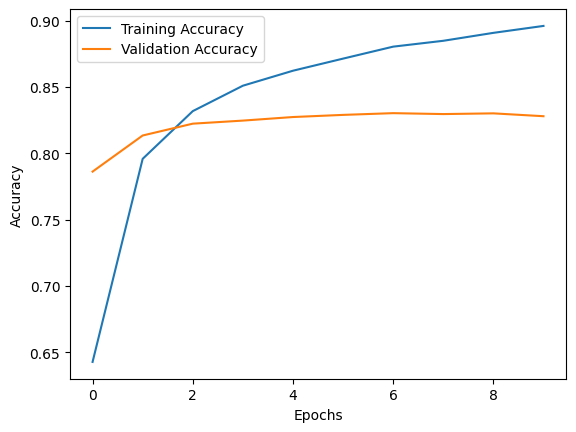

In [56]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [57]:
model.save("text_model")

INFO:tensorflow:Assets written to: text_model\assets


INFO:tensorflow:Assets written to: text_model\assets


In [65]:
loaded_model = loaded_model = tf.keras.models.load_model('text_model')

In [66]:
loaded_model.evaluate(val_data)

13/13 [==============================] - 0s 10ms/step - loss: 0.4271 - accuracy: 0.8280


[0.42708760499954224, 0.8279603123664856]